In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
measurements = pd.read_csv("measurements.csv", converters={"algorithm": str.strip})
del measurements["output"]
measurements

,library,algorithm,runtime
0,openblas,cblas_dswap,12.555150
1,simdleblas,cblas_dswap,12.657321
2,mkl,cblas_dswap,14.924682
3,openblas,cblas_sswap,6.169041
4,simdleblas,cblas_sswap,5.986933
5,mkl,cblas_sswap,6.876939
6,openblas,cblas_ssum,2.317237
7,simdleblas,cblas_ssum,2.903532
8,mkl,cblas_ssum,1.880688
9,openblas,cblas_saxpy,5.464711


In [108]:
split_dataframe = measurements.pivot_table(index=["algorithm"], columns=["library"])
split_dataframe.reset_index(inplace=True)
split_dataframe.columns = [" ".join(col).replace("runtime", "").strip() for col in split_dataframe.columns.values]
split_dataframe

,algorithm,mkl,openblas,simdleblas
0,cblas_daxpy,11.039633,11.198573,10.374979
1,cblas_dcopy,8.410525,9.648656,11.167216
2,cblas_ddot,9.395191,9.239611,8.280362
3,cblas_dswap,14.924682,12.555150,12.657321
4,cblas_idamax,3.491880,10.173720,5.183197
5,cblas_isamax,1.706710,5.040972,2.578600
6,cblas_saxpy,5.506231,5.464711,4.920109
7,cblas_scopy,4.258043,4.670828,4.952567
8,cblas_sdot,4.546034,3.960419,4.013826
9,cblas_ssum,1.880688,2.317237,2.903532


<AxesSubplot:xlabel='algorithm'>

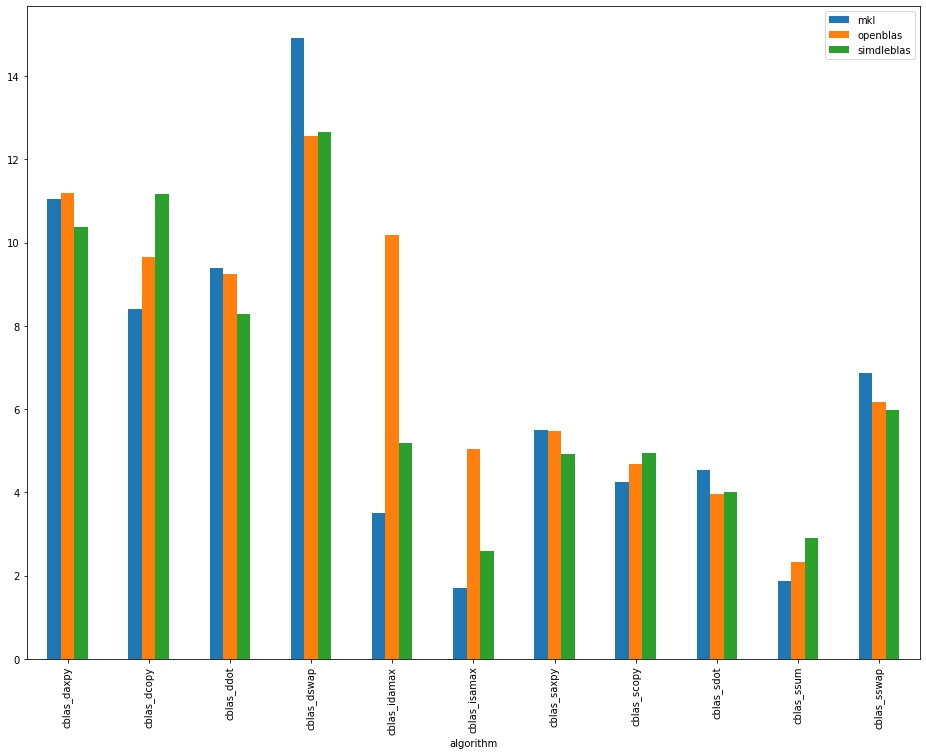

In [112]:
plt.rcParams["figure.figsize"] = (16, 12)
split_dataframe.plot.bar(x="algorithm")